In [320]:
import pandas as pd

In [321]:
#statsdfbad = pd.read_csv("collegstats\college_statistics.csv") # DO NOT NEED
#stats.head(3)

In [322]:
lol = pd.read_csv("collegstats\ids.csv")
lol.head(3)

,espn_id,player_name,nflfastR_id
0,18692,Dan Marino,00-0010379
1,19373,Randall Cunningham,00-0003761
2,19739,Bubby Brister,00-0001785


In [323]:
dfDrPR = pd.read_csv("collegstats\\nfl_draft_profiles.csv")
#draftProfiles = dfDFP[(dfDFP['ovr_rk'].notna())] # 2004+ is when ranking and etc are not NA
#draftProfiles.columns
#draftProfiles.head(3)

In [324]:
dfDFP = pd.read_csv("collegstats\\nfl_draft_prospects.csv")
draftProspects = dfDFP[(dfDFP['draft_year'] >= 2004)] # 2004+ is when ranking and etc are not NA
draftProspects = draftProspects.dropna()

print(draftProspects.columns)
draftProspects['ovr_pick'] = draftProspects['round'] * draftProspects['pick']
draftProspects['college_id'], unique_labels = pd.factorize(draftProspects['school_abbr'])
draftProspects['pos_id'], unique_labels = pd.factorize(draftProspects['position'])
#draftProspects.head(3)


Index(['draft_year', 'player_id', 'player_name', 'position', 'pos_abbr',
       'school', 'school_name', 'school_abbr', 'link', 'pick', 'overall',
       'round', 'traded', 'trade_note', 'team', 'team_abbr', 'team_logo_espn',
       'guid', 'weight', 'height', 'pos_rk', 'ovr_rk', 'grade',
       'player_image'],
      dtype='object')


In [325]:
#What are the key varibales we want in our predictor

# ovr rank, college(turn it to id#), position(run visualization), height, weight, grade, pos rank maybe, 

Correlation: 0.5429772116616804


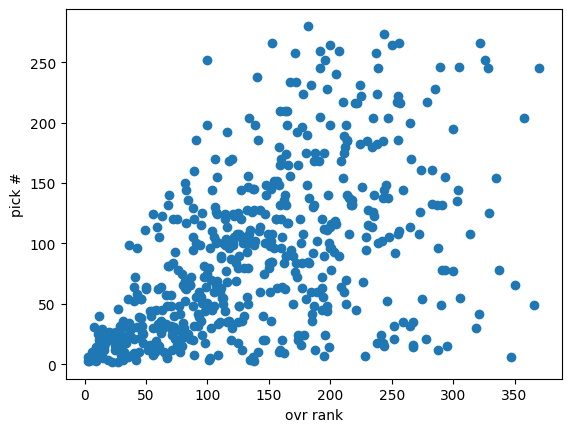

In [326]:
import matplotlib.pyplot as plt
plt.scatter(draftProspects['ovr_rk'], draftProspects['ovr_pick'])
correlation = draftProspects['ovr_rk'].corr(draftProspects['ovr_pick'])
print(f"Correlation: {correlation}")
plt.xlabel('ovr rank')
plt.ylabel('pick #')

plt.show()

Correlation: 0.44367656928051585


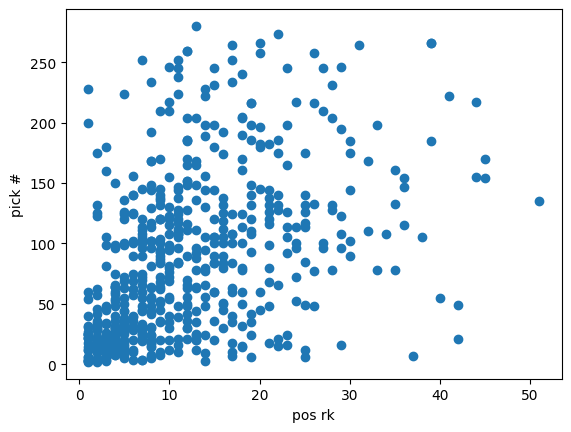

In [327]:
plt.scatter(draftProspects['pos_rk'], draftProspects['ovr_pick'])
correlation = draftProspects['pos_rk'].corr(draftProspects['ovr_pick'])
print(f"Correlation: {correlation}")
plt.xlabel('pos rk')
plt.ylabel('pick #')

plt.show()

Correlation: 0.0028056283109198165


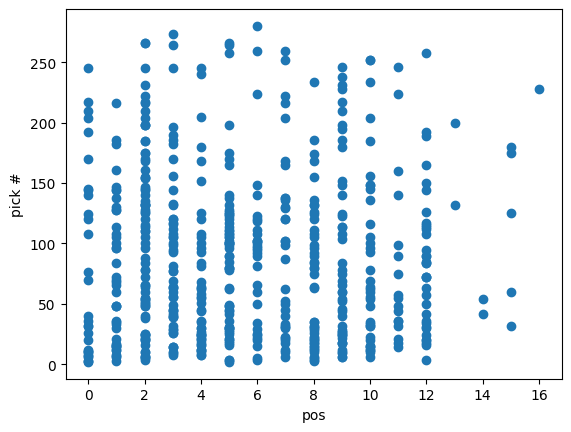

In [328]:
plt.scatter(draftProspects['pos_id'], draftProspects['ovr_pick'])
correlation = draftProspects['pos_id'].corr(draftProspects['ovr_pick'])
print(f"Correlation: {correlation}")
plt.xlabel('pos')
plt.ylabel('pick #')

plt.show()

In [329]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [330]:
collegeqbr = pd.read_csv("collegstats\college_qbr.csv") # QB (DIF REG MODEL)
collegeqbr.dropna()
collegeqbr.head(3)

,season,guid,player_name,age,total_qbr,points_added,qb_plays,total_epa,pass,run,exp_sack,penalty,raw_qbr,sack
0,2004,b518c8332d8a45a6348f93e245d3aca8,Stefan LeFors,23.0,86.3,68.3,351,66.8,66.5,2.8,-3.7,1.6,88.3,-3.7
1,2004,5cb521dc4af2c7598251a369ffaf4c72,Alex Smith,36.0,84.5,75.8,480,73.4,63.5,16.0,-7.3,1.2,83.8,-7.3
2,2004,00be888b38b5e26fc4b4d18aca23e7b7,Jason White,24.0,84.1,56.6,454,61.2,70.9,-6.2,-5.4,2.7,78.5,-6.1


In [331]:
# ovr rank, college(turn it to id#), position(run visualization), height, weight, grade, pos rank maybe, 
predictors = draftProspects[['ovr_rk', 'pos_rk', 'height']]
target = draftProspects['ovr_pick']

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores = cross_val_score(model, predictors, target, cv=5, scoring='r2')

print("R² scores for each fold:", scores)

print("Average R² score:", scores.mean())
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Coefficient: {model.coef_}")


R² scores for each fold: [0.21449224 0.35255811 0.29951611 0.33898481 0.15223049]
Average R² score: 0.27155635061394356
Mean Squared Error: 3289.6710153974423
Coefficient: [0.41527193 0.60444432 0.73476222]


In [332]:
my_data = np.array([[1, 1, 76]])  # New input with 6 features
new_prediction = model.predict(my_data)
print(f"Prediction for new input: {new_prediction}")

Prediction for new input: [27.33806651]


c:\Users\carte\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


NOW WE WANT LOGISTIC REG ON IF A QB WILL BE A FIRST/SECOND ROUND PICK

In [333]:
collegeqbr = pd.read_csv("collegstats\college_qbr.csv") # QB (DIF REG MODEL)
collegeqbr.head(3)


,season,guid,player_name,age,total_qbr,points_added,qb_plays,total_epa,pass,run,exp_sack,penalty,raw_qbr,sack
0,2004,b518c8332d8a45a6348f93e245d3aca8,Stefan LeFors,23.0,86.3,68.3,351,66.8,66.5,2.8,-3.7,1.6,88.3,-3.7
1,2004,5cb521dc4af2c7598251a369ffaf4c72,Alex Smith,36.0,84.5,75.8,480,73.4,63.5,16.0,-7.3,1.2,83.8,-7.3
2,2004,00be888b38b5e26fc4b4d18aca23e7b7,Jason White,24.0,84.1,56.6,454,61.2,70.9,-6.2,-5.4,2.7,78.5,-6.1


In [334]:
qbprofile = pd.read_csv("collegstats\\nfl_draft_prospects.csv")

qbprofile = qbprofile[qbprofile['pos_abbr'] == 'QB']
qbprofile = qbprofile.dropna(subset=['round'])
qbprofile.head(3)

,draft_year,player_id,player_name,position,pos_abbr,school,school_name,school_abbr,link,pick,...,team,team_abbr,team_logo_espn,guid,weight,height,pos_rk,ovr_rk,grade,player_image
2,1967,23592,Steve Spurrier,Quarterback,QB,Florida,Gators,FLA,http://insider.espn.com/nfl/draft/player/_/id/...,3.0,...,San Francisco 49ers,SF,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1967,23593,Bob Griese,Quarterback,QB,Purdue,Boilermakers,PUR,http://insider.espn.com/nfl/draft/player/_/id/...,4.0,...,Miami Dolphins,MIA,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1967,23614,Don Horn,Quarterback,QB,San Diego State,Aztecs,SDSU,http://insider.espn.com/nfl/draft/player/_/id/...,25.0,...,Green Bay Packers,GB,https://a.espncdn.com/i/teamlogos/nfl/500/scor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [335]:

collegeqbr['guid'] = collegeqbr['guid'].astype(str)
qbprofile['guid'] = qbdraftprospects['guid'].astype(str)
#print(collegeqbr[collegeqbr['player_name'] == 'Garrett Gilbert'])
#print(qbprofile[qbprofile['player_name'] == 'Garrett Gilbert'])

mergeddf = pd.merge(collegeqbr, qbprofile, on='guid', how='inner')
mergeddf = mergeddf.drop(columns = ['school', 'traded', 'link', 'school_abbr', 'trade_note', 'team', 'team_abbr', 'team_logo_espn', 'player_image', 'player_name_y'
, 'age', 'guidnew', 'pick', 'overall', 'position', 'pos_abbr', 'school_name', 'player_id', 'draft_year'])
mergeddf.head()



KeyError: "['guidnew'] not found in axis"

WE HAVE MANY SEASONS PER PLAYER, MUST FIX

In [309]:

max_df = mergeddf.groupby(by=["player_name_x"], dropna=False).max().reset_index()
max_df['firstsecond'] = mergeddf['round'] <= 2

max_df.head(2)

,player_name_x,season,guid,total_qbr,points_added,qb_plays,total_epa,pass,run,exp_sack,penalty,raw_qbr,sack,round,weight,height,pos_rk,ovr_rk,grade,firstsecond
0,Brad Kaaya,2016,8c5f3bcf094e628136fc64e125c865d8,69.4,27.7,493,41.6,56.2,0.2,-9.6,2.4,64.6,-12.1,6.0,214.0,76.0,8.0,116.0,69.0,True
1,C.J. Beathard,2016,b7900f2ec45d6bab7785f65b3f24dd83,69.7,31.1,500,47.0,42.5,22.9,-17.0,1.0,65.6,-19.1,3.0,219.0,75.0,9.0,156.0,59.0,True


In [336]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [338]:
predictorslog = max_df[['total_qbr', 'points_added', 'total_epa', 'pass', 'raw_qbr', 'pos_rk', 'ovr_rk', 'grade']]
targetlog = max_df['firstsecond']
X_train, X_test, y_train, y_test = train_test_split(predictorslog, targetlog, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print(logreg.coef_)




Accuracy: 0.44
Confusion Matrix:
 [[3 2]
 [3 1]]
Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.60      0.55         5
        True       0.33      0.25      0.29         4

    accuracy                           0.44         9
   macro avg       0.42      0.42      0.42         9
weighted avg       0.43      0.44      0.43         9

[[ 0.02466685 -0.03752231  0.06269762 -0.05475483  0.09475223  0.05717588
  -0.0093571  -0.09925673]]


c:\Users\carte\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
